In [1]:
#coding:utf-8
%reload_ext autoreload 
%autoreload 2
from asyncio import Future
import asyncio
from asyncio.queues import Queue
import uvloop
asyncio.set_event_loop_policy(uvloop.EventLoopPolicy())

import tensorflow as tf
import numpy as np
import os
import sys
import random
import time
import argparse
from collections import deque, defaultdict, namedtuple
import scipy.stats
from threading import Lock
from concurrent.futures import ThreadPoolExecutor

/usr/local/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def create_position_labels():
    labels_array = []
    letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
    letters.reverse()
    numbers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

    for l1 in range(9):
        for n1 in range(10):
            move = letters[8 - l1] + numbers[n1]
            labels_array.append(move)
#     labels_array.reverse()
    return labels_array

In [3]:
from cchess_zero.gameboard import *

In [4]:
#labels = create_uci_labels()
pos_label = create_position_labels()

In [5]:
gb = GameBoard()

In [6]:
gb.print_borad(gb.state)

  abcdefghi
0 RNBAKABNR
1          
2  C     C 
3 P P P P P
4          
5          
6 p p p p p
7  c     c 
8          
9 rnbakabnr


In [7]:
len(gb.get_legal_moves(gb.state,'w')),gb.get_legal_moves(gb.state,'w')[0]

(44, 'a0a1')

In [8]:
gb.print_borad(gb.sim_do_action('a0a1',gb.state))

  abcdefghi
0  NBAKABNR
1 R        
2  C     C 
3 P P P P P
4          
5          
6 p p p p p
7  c     c 
8          
9 rnbakabnr


In [ ]:
from cchess_zero import board_visualizer
import cv2

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

In [187]:
game_states = gb.sim_do_action('h2e2',gb.state)
game_states = gb.sim_do_action('h9g7',game_states)

In [188]:
pic = board_visualizer.get_board_img(game_states)

In [197]:
random.choice(gb.get_legal_moves(game_states,'b'))

'b7b5'

# random walk

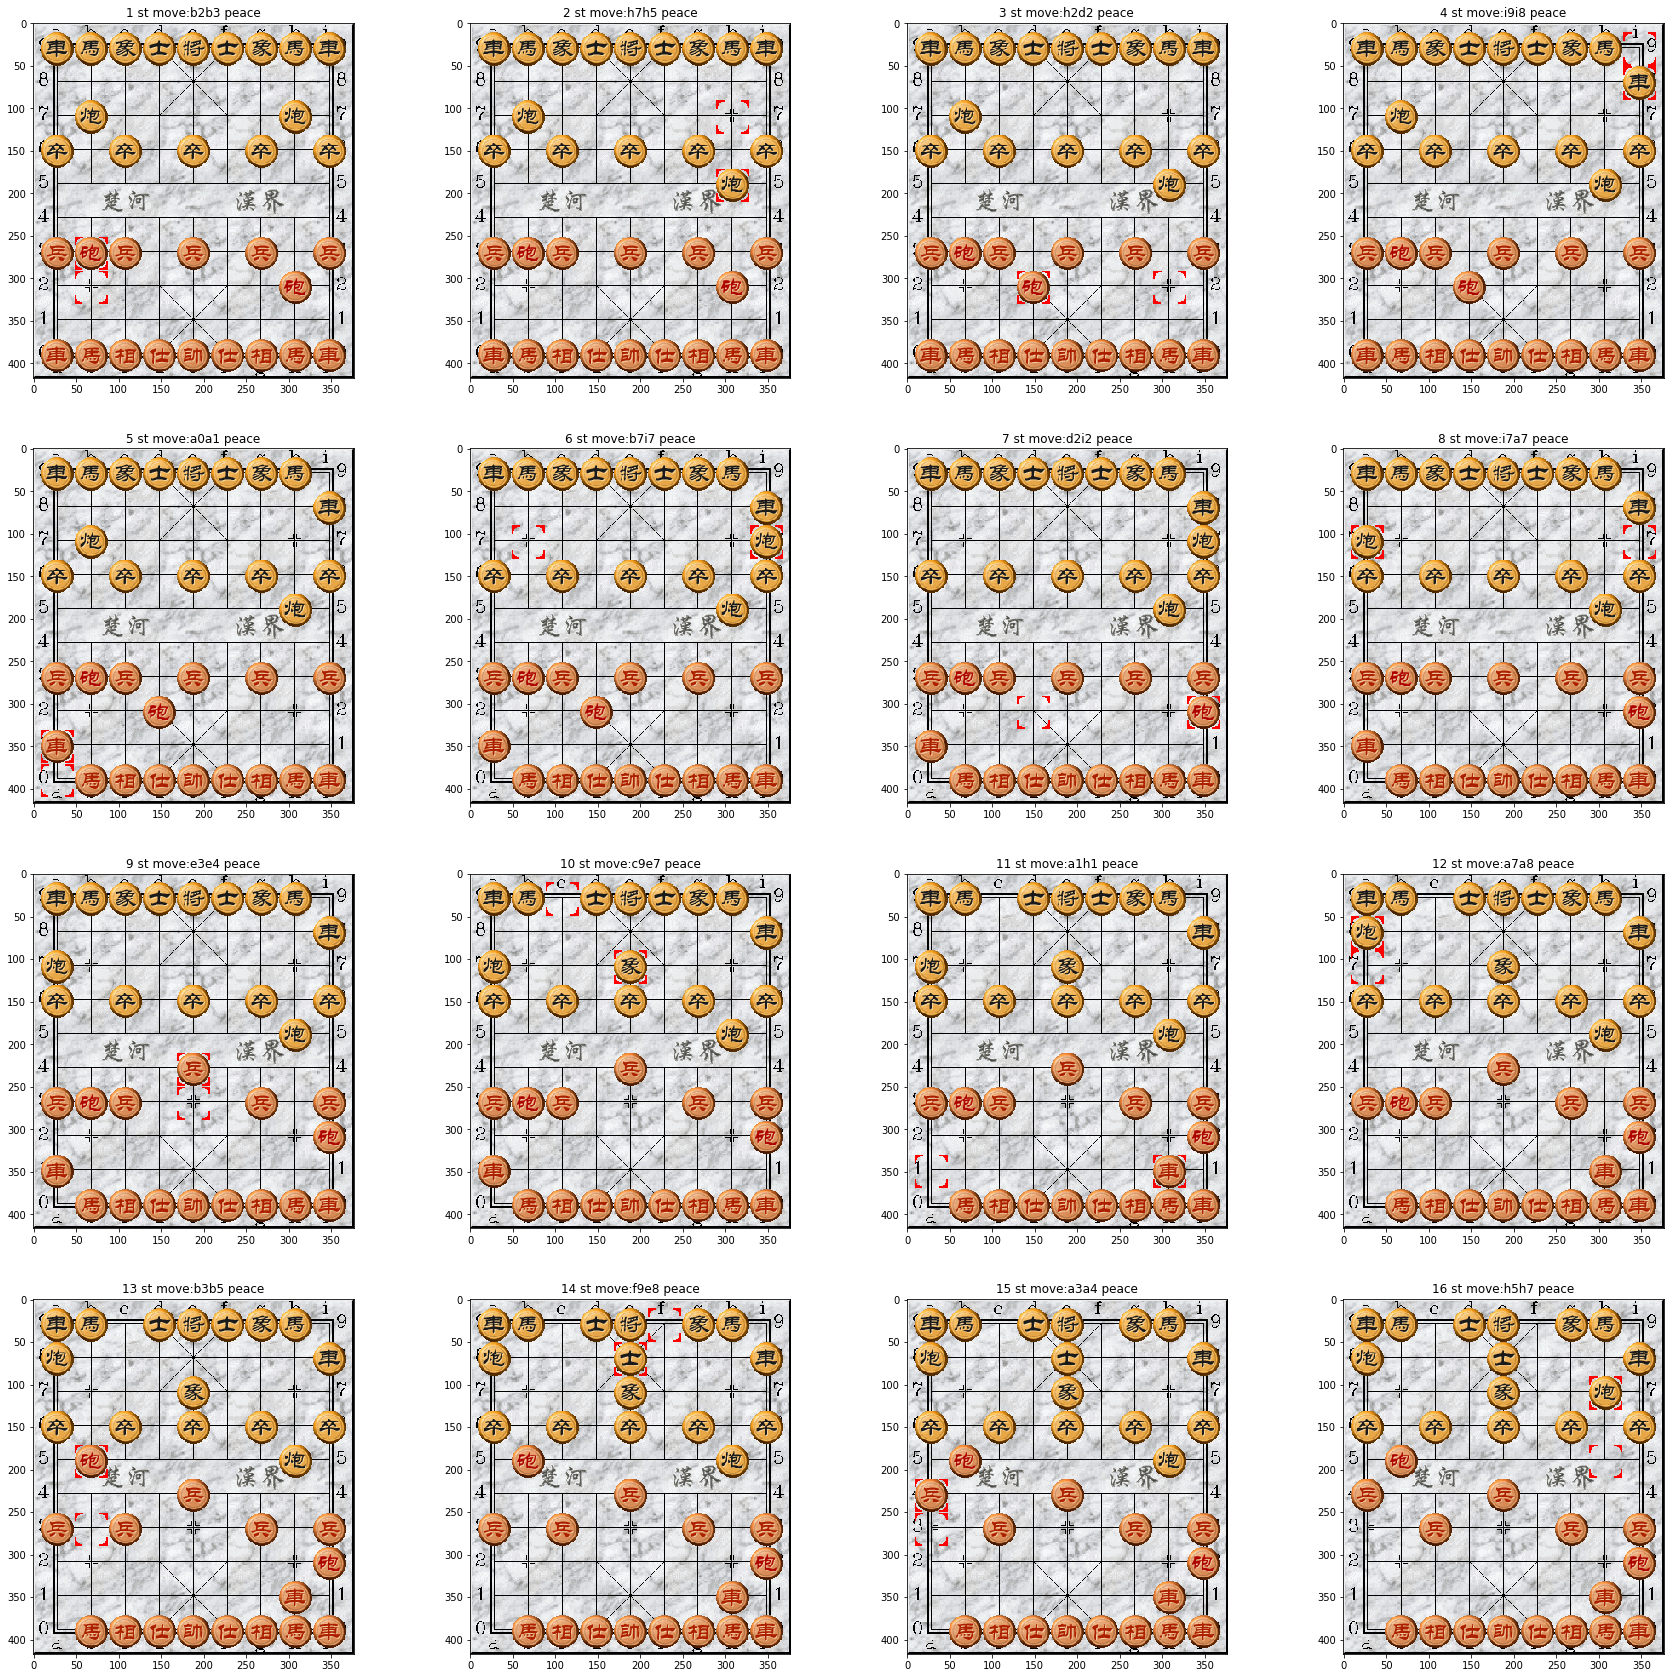

In [361]:
plt.figure(figsize=(30,30))
game_states = gb.state
for i in range(4):
    for j in range(4):
        if j % 2 == 0:
            player = 'w'
        else:
            player = 'b'
        move = random.choice(gb.get_legal_moves(game_states,player))
        prev = game_states
        game_states = gb.sim_do_action(move,game_states)
        kill = 'kill' if  is_kill_move(prev,game_states) else 'peace'
        pic = board_visualizer.get_board_img(game_states,action=move)
        plt.subplot(4,4,i * 4 + j + 1)
        plt.imshow(pic)
        plt.title("{} st move:{} {}".format(i * 4 + j + 1,move,kill))

In [5]:
!nvidia-smi

Sun May 13 17:02:29 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.111                Driver Version: 384.111                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:05:00.0 Off |                  N/A |
| 31%   48C    P8    20W / 250W |    625MiB / 11172MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:42:00.0 Off |                  N/A |
| 65%   87C    P2   172W / 250W |   4602MiB / 11172MiB |     90%      Default |
+-------------------------------+----------------------+----------------------+
        

In [4]:
from net import resnet

In [5]:
import common
from common import board
labels = common.board.create_uci_labels()

In [6]:
(sess,graph),((X,training),(net_softmax,value_head)) = resnet.get_model('models/5_7_resnet_joint-two_stage/model_57',labels)

0
[None, 10, 9, 256]
[None, 10, 9, 256]
[None, 10, 9, 256]
[None, 10, 9, 256]
inside res net [None, 10, 9, 256]
INFO:tensorflow:Restoring parameters from models/5_7_resnet_joint-two_stage/model_57


In [7]:
(sess,graph),((X,training),(net_softmax,value_head))

((<tensorflow.python.client.session.Session at 0x7f9727790128>,
  <tensorflow.python.framework.ops.Graph at 0x7f9729ded1d0>),
 ((<tf.Tensor 'Placeholder:0' shape=(?, 10, 9, 14) dtype=float32>,
   <tf.Tensor 'training_mode:0' shape=<unknown> dtype=bool>),
  (<tf.Tensor 'concat_128:0' shape=(?, 2086) dtype=float32>,
   <tf.Tensor 'concat_129:0' shape=(?, 1) dtype=float32>)))

In [8]:
from cchess_zero import mcts

In [9]:
mcts.MCTS,mcts.TreeNode

(cchess_zero.mcts.MCTS, cchess_zero.mcts.TreeNode)

In [13]:
gb.state

'RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c1/9/rnbakabnr'

In [10]:
from cchess import *
from common import board
import common
from game_convert import boardarr2netinput

In [11]:
'12345'.find('3'),list(range(0,-3,-1))

(2, [0, -1, -2])

In [12]:
uci_labels = common.board.create_uci_labels()
class GameState():
    def __init__(self):
        self.statestr = 'RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c1/9/rnbakabnr'
        self.currentplayer = 'w'
        self.ys = '9876543210'[::-1]
        self.xs = 'abcdefghi'
        self.pastdic = {}
        self.maxrepeat = 0
    def get_king_pos(self):
        board = self.statestr.replace("1", " ")
        board = board.replace("2", "  ")
        board = board.replace("3", "   ")
        board = board.replace("4", "    ")
        board = board.replace("5", "     ")
        board = board.replace("6", "      ")
        board = board.replace("7", "       ")
        board = board.replace("8", "        ")
        board = board.replace("9", "         ")
        board = board.split('/')

        for i in range(3):
            pos = board[i].find('K')
            if pos != -1:
                K = "{}{}".format(self.xs[pos],self.ys[i])
        for i in range(-1,-4,-1):
            pos = board[i].find('k')
            if pos != -1:
                k = "{}{}".format(self.xs[pos],self.ys[i])
        return K,k
            
    def game_end(self):
        #if self.statestr.find('k') == -1:
        #    return True,'w'
        #elif self.statestr.find('K') == -1:
        #    return True,'b'
        if self.maxrepeat >= 3:
            return True,self.get_current_player()
        wk,bk = self.get_king_pos()
        targetkingdic = {'b':wk,'w':bk}
        moveset = GameBoard.get_legal_moves(self.statestr,self.get_current_player())
        
        targetset = set([i[-2:] for i in moveset])
        
        targ_king = targetkingdic[self.currentplayer]
        if targ_king in targetset:
            return True,self.currentplayer
        return False,None
    
    def get_current_player(self):
        return self.currentplayer
    
    def do_move(self,move):
        self.statestr = GameBoard.sim_do_action(move,self.statestr)
        if self.currentplayer == 'w':
            self.currentplayer = 'b'
        elif self.currentplayer == 'b':
            self.currentplayer = 'w'
        self.pastdic.setdefault(self.statestr,0)
        self.pastdic[self.statestr] += 1
        self.maxrepeat = max(self.maxrepeat,self.pastdic[self.statestr])
    
def policy_value_fn(state):
    bb = BaseChessBoard(state.statestr)
    statestr = bb.get_board_arr()
    net_x = np.transpose(boardarr2netinput(statestr,state.get_current_player()),[1,2,0])
    net_x = np.expand_dims(net_x,0)
    
    with graph.as_default():
        policyout,valout = sess.run([net_softmax,value_head],feed_dict={X:net_x,training:False})
        policyout,valout = policyout[0],valout[0][0]
    
    legal_move = GameBoard.get_legal_moves(state.statestr,state.get_current_player())
    #if state.currentplayer == 'b':
    #    legal_move = board.flipped_uci_labels(legal_move)
    legal_move = set(legal_move)
    
    action_probs = []
    for move,prob in zip(uci_labels,policyout):
        if state.currentplayer == 'b':
            move = board.flipped_uci_labels([move])[0]
        if move in legal_move:
            action_probs.append((move,prob))
    action_probs = sorted(action_probs,key=lambda x:x[1])
    return action_probs, valout

In [15]:
sss = GameState()
sss.game_end()

(False, None)

In [16]:
GameBoard.print_borad(sss.statestr)

  abcdefghi
0 RNBAKABNR
1          
2  C     C 
3 P P P P P
4          
5          
6 p p p p p
7  c     c 
8          
9 rnbakabnr


In [464]:
bb = BaseChessBoard(gb.state)
statestr = bb.get_board_arr()
net_x = np.transpose(boardarr2netinput(statestr,'w'),[1,2,0])
net_x = np.expand_dims(net_x,0)

In [1011]:
net_x.shape

(1, 10, 9, 14)

In [1023]:
begin = time.time()
for i in range(1600):
    with graph.as_default():
        policyout,valout = sess.run([net_softmax,value_head],feed_dict={X:net_x,training:False})
        #(sess,graph),((X,training),(net_softmax,value_head))
print(time.time() - begin)

13.539233207702637


In [342]:
policyout.shape

(1, 2086)

In [343]:
valout

array([[ 0.02201885]], dtype=float32)

In [389]:
legal_move = GameBoard.get_legal_moves(gb.state,'b')

In [390]:
legal_move = set(legal_move)

In [ ]:
gs = GameState()
policy_value_fn(gs)

In [440]:
bb = BaseChessBoard(gs.statestr)
statestr = bb.get_board_arr()
np.sum(boardarr2netinput(statestr,gs.get_current_player()),axis=0)

array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 1, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint64)

In [441]:
gs.get_current_player()

'w'

In [442]:
gs.do_move('h2e2')

In [ ]:
policy_value_fn(gs)

In [10]:
def get_random_policy(policies):
    sumnum = sum([i[1] for i in policies])
    randnum = random.random() * sumnum
    tmp = 0
    for val,pos in policies:
        tmp += pos
        if tmp > randnum:
            return val
    

# policy network random self-play

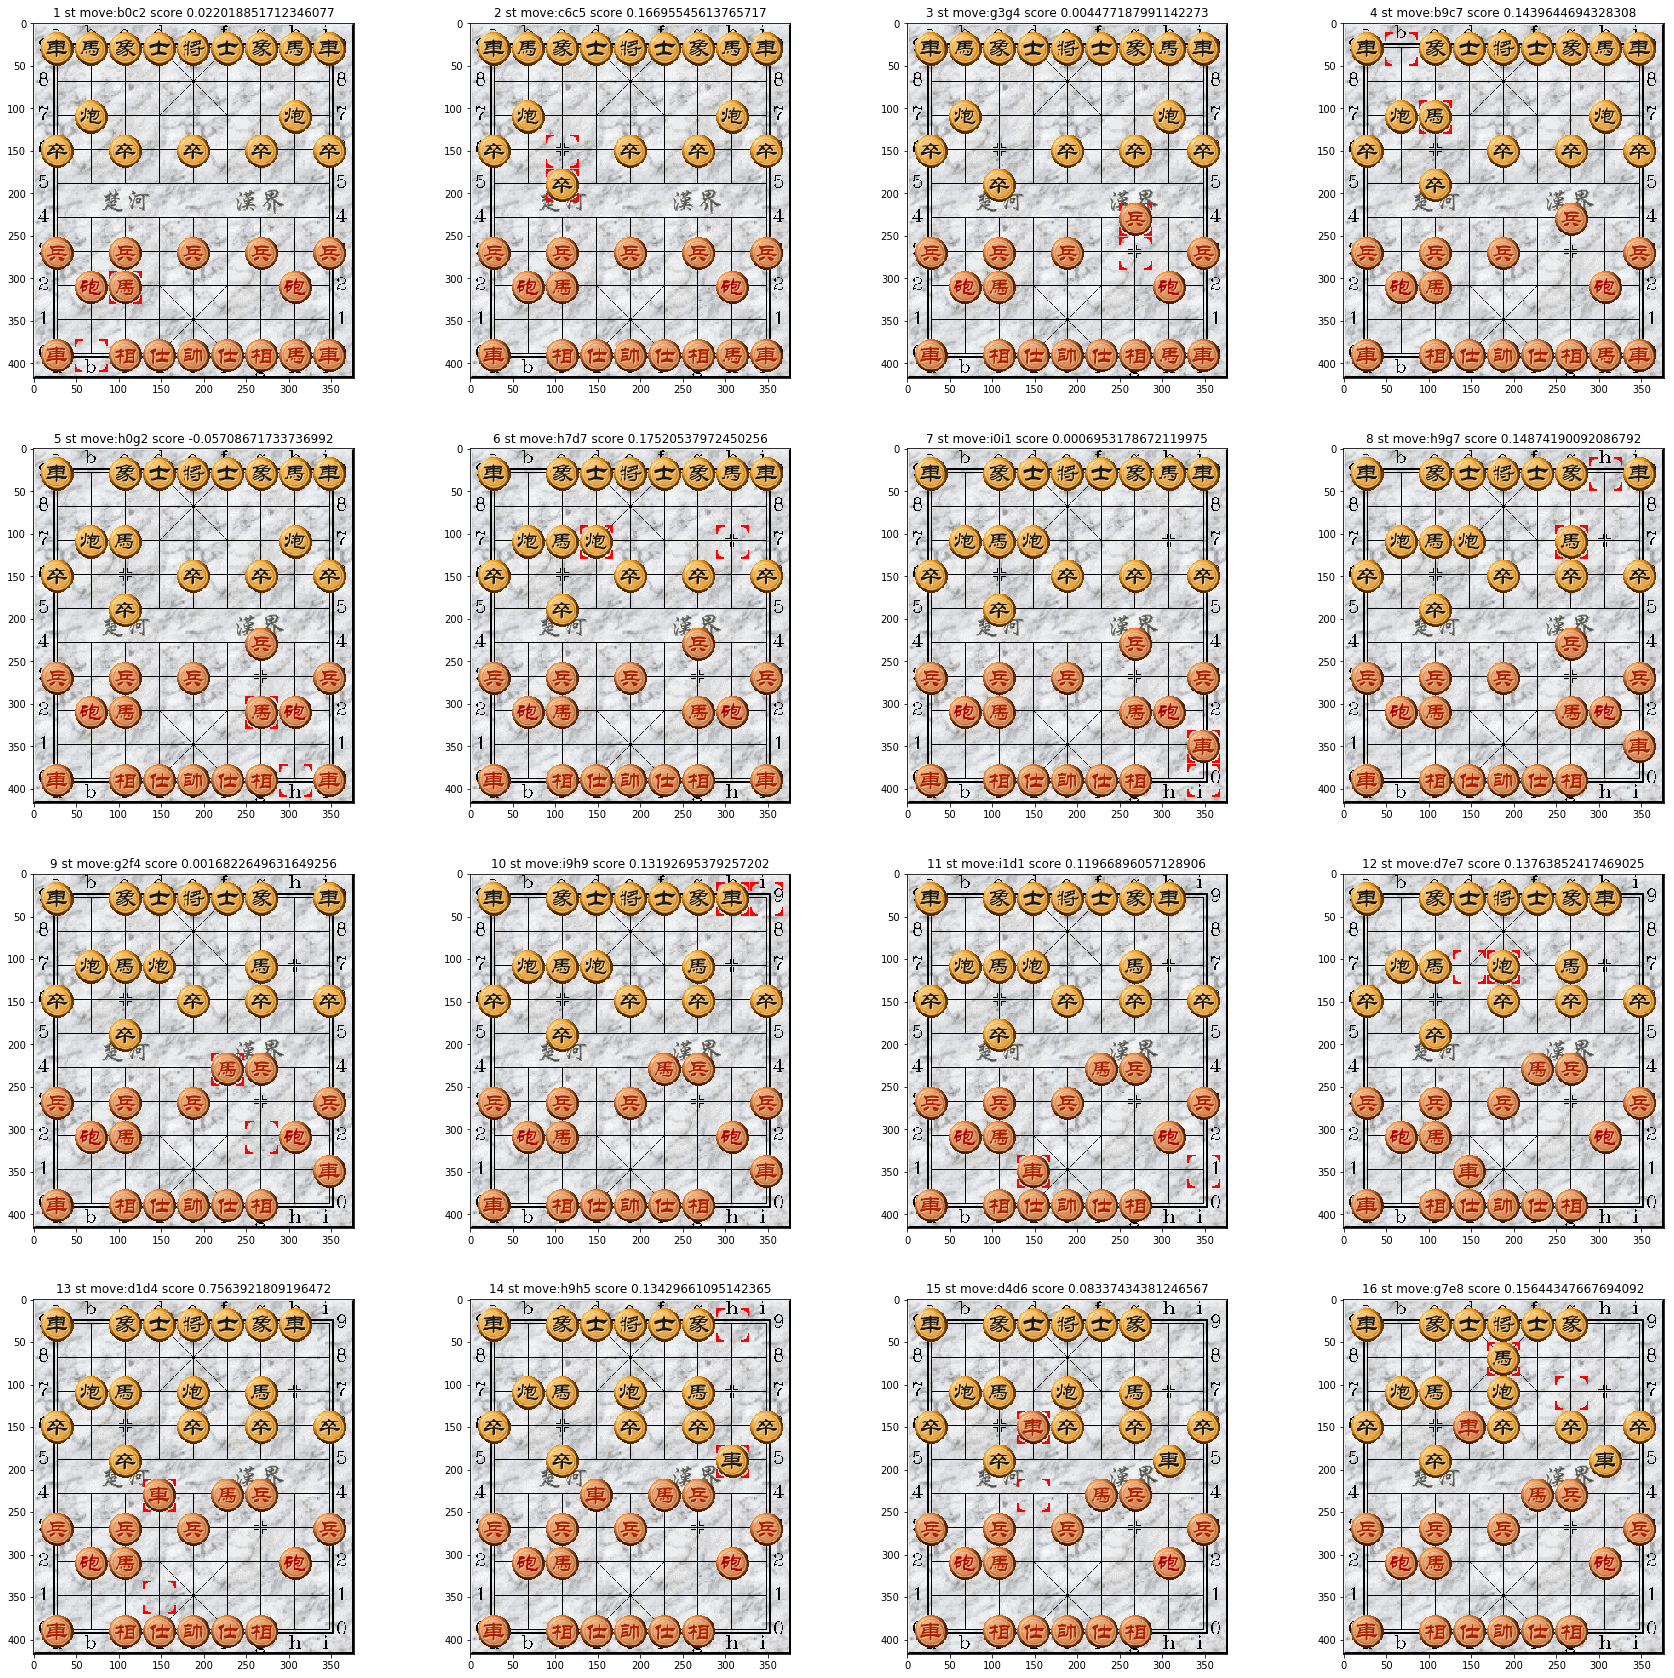

In [473]:
plt.figure(figsize=(30,30))
game_states = GameState()
for i in range(4):
    for j in range(4):
        policies,score = policy_value_fn(game_states)
        if j % 2 == 0:
            player = 'w'
        else:
            player = 'b'
            score = -score
        #move = random.choice(gb.get_legal_moves(game_states,player))
        
        move = get_random_policy(policies)
        #prev = game_states
        #game_states = gb.sim_do_action(move,game_states)
        game_states.do_move(move)
        
        #kill = 'kill' if  is_kill_move(prev,game_states) else 'peace'
        pic = board_visualizer.get_board_img(game_states.statestr,action=move)
        plt.subplot(4,4,i * 4 + j + 1)
        plt.imshow(pic)
        plt.title("{} st move:{} score {}".format(i * 4 + j + 1,move,score))

In [475]:
#plt.figure(figsize=(30,30))
begin = time.time()
game_states = GameState()
for i in range(4):
    for j in range(25):
        policies,score = policy_value_fn(game_states)
        if j % 2 == 0:
            player = 'w'
        else:
            player = 'b'
            score = -score
        #move = random.choice(gb.get_legal_moves(game_states,player))
        
        move = get_random_policy(policies)
        #prev = game_states
        #game_states = gb.sim_do_action(move,game_states)
        game_states.do_move(move)
        
print(time.time() - begin)

1.1341381072998047


In [ ]:
#plt.figure(figsize=(30,30))
begin = time.time()
game_states = GameState()
for i in range(4):
    for j in range(25):
        policies,score = policy_value_fn(game_states)
        if j % 2 == 0:
            player = 'w'
        else:
            player = 'b'
            score = -score
        #move = random.choice(gb.get_legal_moves(game_states,player))
        
        move = get_random_policy(policies)
        #prev = game_states
        #game_states = gb.sim_do_action(move,game_states)
        game_states.do_move(move)
        
print(time.time() - begin)

In [15]:
game_states = GameState()
mcts_policy = mcts.MCTS(policy_value_fn,n_playout=1600)

NameError: name 'mcts' is not defined

In [515]:
acts, act_probs = mcts_policy.get_move_probs(game_states,temp=1,verbose=False)

In [14]:
list(zip(acts, act_probs))[-8:]

NameError: name 'acts' is not defined

In [523]:
policies[-8:]

[('g2i3', 0.012670411),
 ('e8i8', 0.013614578),
 ('g1f1', 0.017951151),
 ('e8d8', 0.020471435),
 ('e8f8', 0.032529991),
 ('g1h1', 0.049127255),
 ('g2h4', 0.23642081),
 ('g2f4', 0.53411847)]

In [518]:
mcts_policy._root._n_visits,mcts_policy._root._Q

(1600, -0.093835023573210538)

In [526]:
game_states.statestr

'RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c1/9/rnbakabnr'

# gameplay between MCTS and policy network

## MCTS play as blck

In [ ]:
states = []
moves = []
game_states = GameState()
for i in range(100):
    if i % 2 == 0:
        player = 'w'
        policies,score = policy_value_fn(game_states)
    else:
        player = 'b'
        mcts_policy = mcts.MCTS(policy_value_fn,n_playout=1600)
        if i < 18:
            temp = 1
        else:
            temp = 1e-2
        acts, act_probs = mcts_policy.get_move_probs(game_states,temp=temp,verbose=False)
        policies,score = list(zip(acts, act_probs)),mcts_policy._root._Q
        #score = -score
        
    move = get_random_policy(policies)
    game_states.do_move(move)
    states.append(game_states.statestr)
    moves.append(move)
    print("move {} player {} move {} value {}".format(i + 1,player,move,score))

## MCTS play as red

In [753]:
states = []
moves = []
game_states = GameState()
for i in range(100):
    if game_states.game_end()[0] == True:
        break
    start = time.time()
    if i % 2 == 0:
        player = 'w'
        mcts_policy = mcts.MCTS(policy_value_fn,n_playout=1600)
        if i < 18:
            temp = 1
        else:
            temp = 1e-2
        acts, act_probs = mcts_policy.get_move_probs(game_states,temp=temp,verbose=False)
        policies,score = list(zip(acts, act_probs)),mcts_policy._root._Q
        score = -score
    else:
        player = 'b'
        policies,score = policy_value_fn(game_states)
        score = -score
        
    move = get_random_policy(policies)
    states.append(game_states.statestr)
    moves.append(move)
    game_states.do_move(move)
    
    print("move {} player {} move {} value {} time {}".format(i + 1,player,move,score,time.time() - start))

move 1 player w move h2e2 value 0.09383502357321054 time 22.778339624404907
move 2 player b move h9g7 value 0.1451854407787323 time 0.012688875198364258
move 3 player w move h0g2 value 0.042952390882237484 time 24.057861804962158
move 4 player b move i9h9 value 0.12968379259109497 time 0.01716446876525879
move 5 player w move i0h0 value 0.036875513912818896 time 23.230412483215332
move 6 player b move b9c7 value 0.09577298909425735 time 0.012810468673706055
move 7 player w move g3g4 value 0.0367473454162973 time 24.18171191215515
move 8 player b move c6c5 value 0.0834152102470398 time 0.01316380500793457
move 9 player w move b0a2 value 0.020431227798490006 time 22.797877311706543
move 10 player b move a6a5 value 0.15857769548892975 time 0.013184785842895508
move 11 player w move a0a1 value 0.03777836319881316 time 24.284358978271484
move 12 player b move a5a4 value 0.09899429231882095 time 0.018759727478027344
move 13 player w move a3a4 value 0.08358258775271678 time 25.06053376197815


In [905]:
num = -1

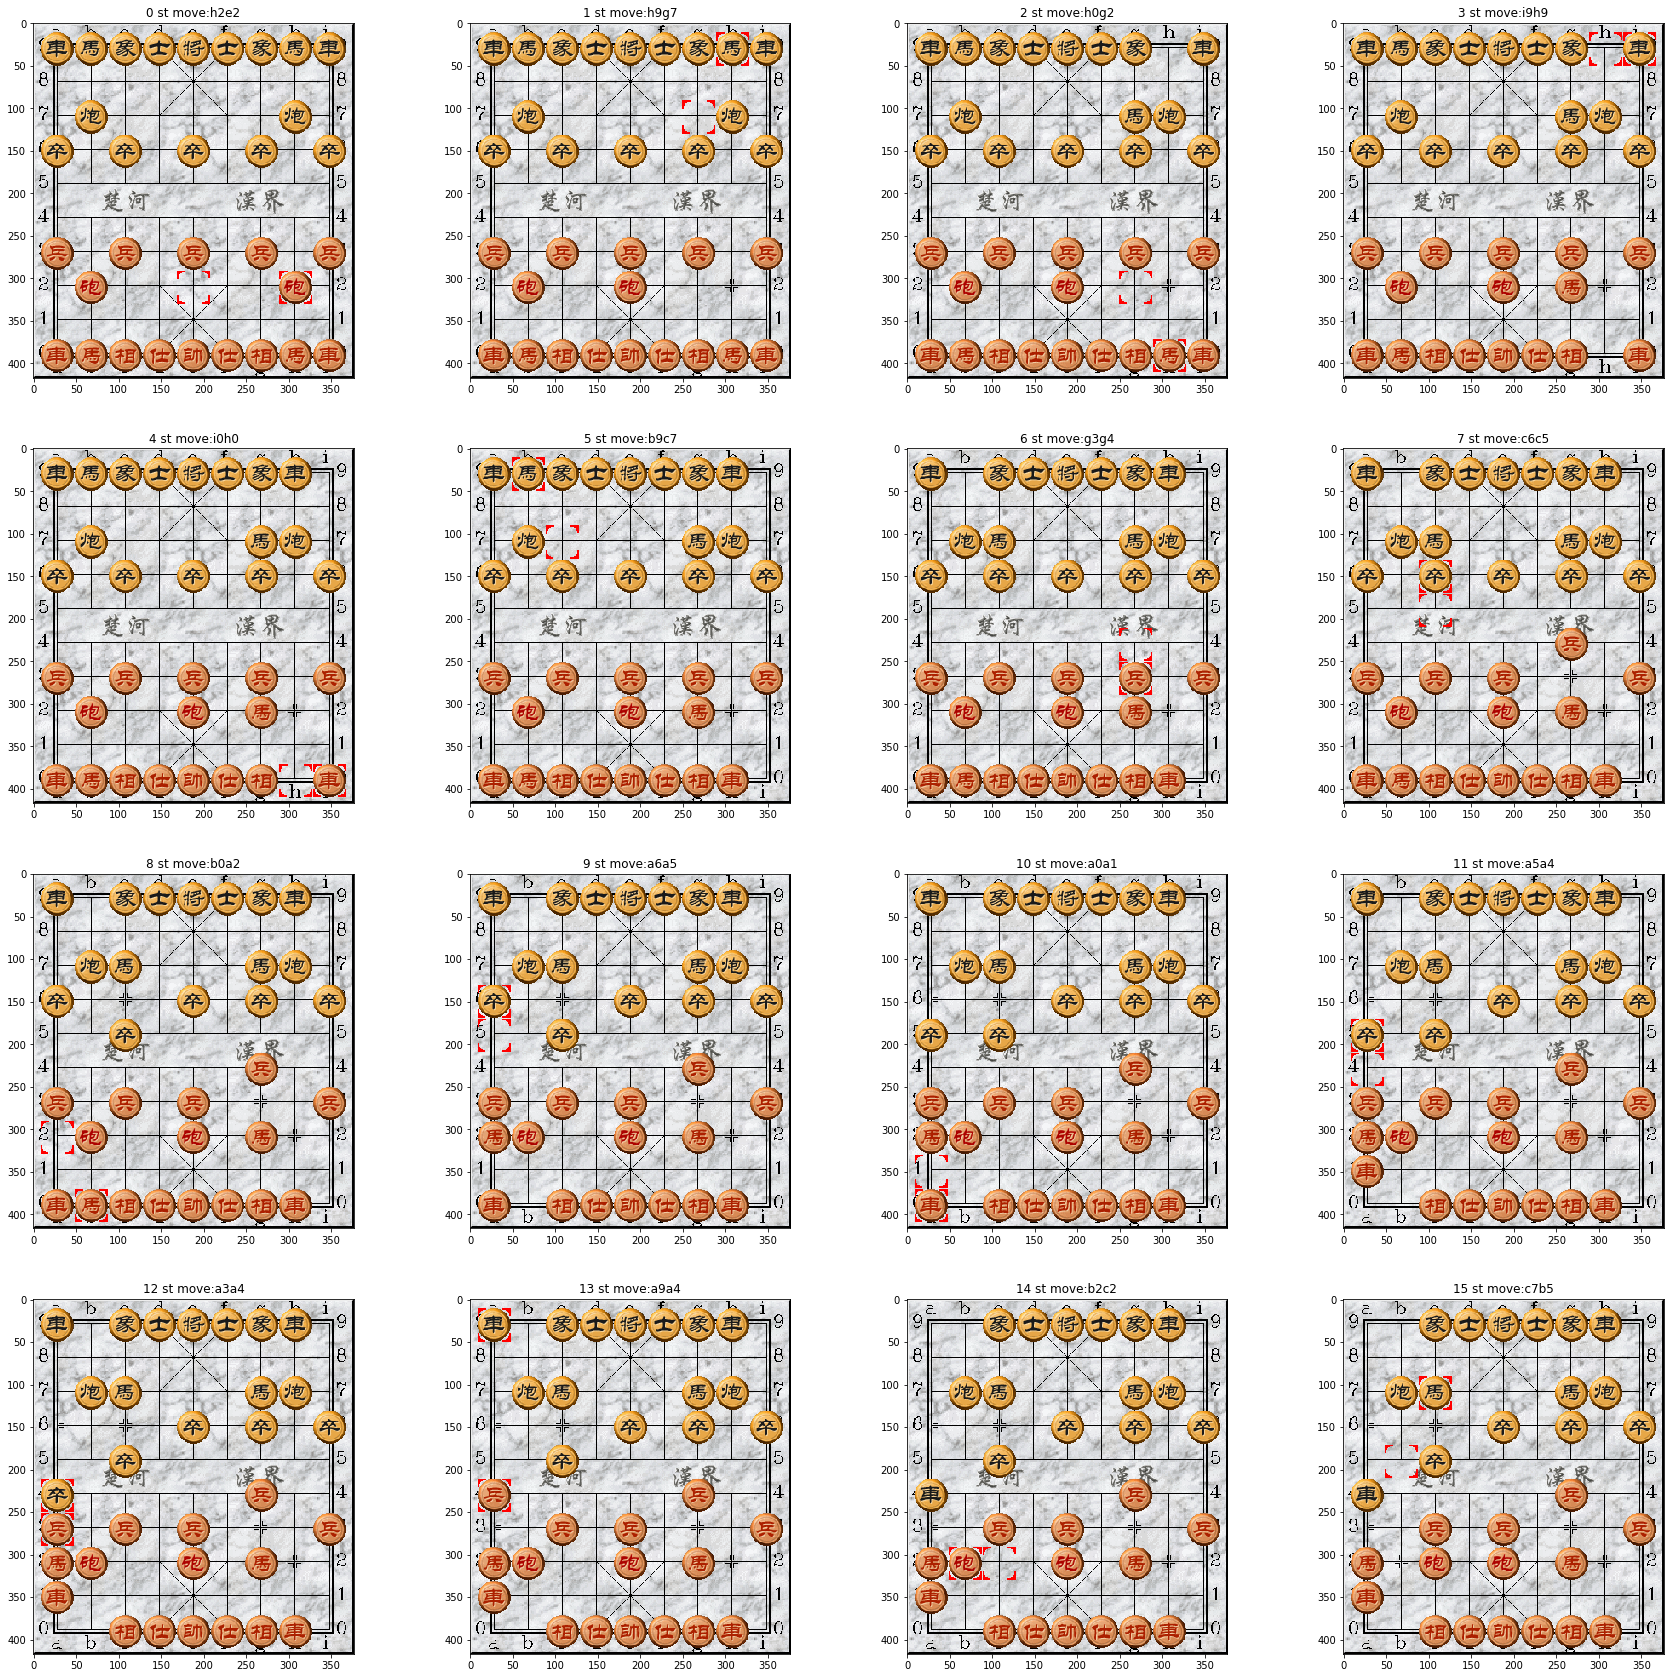

In [906]:
plt.figure(figsize=(30,30))
#game_states = GameState()

for i in range(4):
    for j in range(4):
        policies,score = policy_value_fn(game_states)
        if j % 2 == 0:
            player = 'w'
        else:
            player = 'b'
            score = -score
        #move = random.choice(gb.get_legal_moves(game_states,player))
        
        #move = get_random_policy(policies)
        #prev = game_states
        #game_states = gb.sim_do_action(move,game_states)
        #game_states.do_move(move)
        num += 1
        ss = states[num]
        mm = moves[num]
        #kill = 'kill' if  is_kill_move(prev,game_states) else 'peace'
        pic = board_visualizer.get_board_img(ss,action=mm)
        plt.subplot(4,4,i * 4 + j + 1)
        plt.imshow(pic)
        plt.title("{} st move:{}".format(num,mm))

# write to cbf

In [14]:
from cchess_zero import cbf

In [915]:
cbfile = cbf.CBF(black='policy network',red='mcts',date='1957-11-16',site='北京',name='noname',datemodify='1957-11-16',
                redteam='shit',blackteam='funn',round='第十五轮')

In [916]:
cbfile.receive_moves(moves)

In [917]:
!mkdir data/self-plays

mkdir: 无法创建目录"data/self-plays": 文件已存在


In [918]:
cbfile.dump('data/self-plays/2.cbf')

In [925]:
print(open('data/self-plays/2.cbf','r',encoding='utf-8').read()[:300])

<?xml version="1.0" encoding="UTF-8"?>
<ChineseChessRecord Version="1.0">
 <Head>
  <Name>noname</Name>
  <URL />
  <From>{{from}}</From>
  <ContestType />
  <Contest />
  <Round>第十五轮</Round>
  <Group />
  <Table />
  <Date>1957-11-16</Date>
  <Site>北京</Site>
  <TimeRule />
  <Red>mcts</Red>
  <RedT


# MCTS self-play

In [ ]:
winners = []
for one_play in range(1,100):
    states = []
    moves = []
    
    game_states = GameState()
    result = 'peace'
    for i in range(100):
        is_end,winner = game_states.game_end()
        if is_end == True:
            result = winner
            break
        start = time.time()
        if i % 2 == 0:
            player = 'w'
            mcts_policy = mcts.MCTS(policy_value_fn,n_playout=1600)
            if i < 18:
                temp = 1
            else:
                temp = 1e-2
            acts, act_probs = mcts_policy.get_move_probs(game_states,temp=temp,verbose=False)
            policies,score = list(zip(acts, act_probs)),mcts_policy._root._Q
            score = -score
        else:
            player = 'b'
            policies,score = policy_value_fn(game_states)
            score = -score

        move = get_random_policy(policies)
        states.append(game_states.statestr)
        moves.append(move)
        game_states.do_move(move)
        print('{},'.format(i + 1),end='')
        #print("move {} player {} move {} value {} time {}".format(i + 1,player,move,score,time.time() - start))
        
        
    cbfile = cbf.CBF(black='policy network',red='mcts',date='2018-05-10',site='北京',name='noname',datemodify='2018-05-10',
            redteam='shit',blackteam='funn',round='第一轮')
    cbfile.receive_moves(moves)
    cbfile.dump('data/self-plays/mcts-policy_{}.cbf'.format(one_play))
    winners.append(winner)
    print('one finished')
    
    
    
    states = []
    moves = []
    
    game_states = GameState()
    result = 'peace'
    for i in range(100):
        is_end,winner = game_states.game_end()
        if is_end == True:
            result = winner
            break
        start = time.time()
        if i % 2 == 0:
            player = 'w'
            mcts_policy = mcts.MCTS(policy_value_fn,n_playout=1600)
            if i < 18:
                temp = 1
            else:
                temp = 1e-2
            acts, act_probs = mcts_policy.get_move_probs(game_states,temp=temp,verbose=False)
            policies,score = list(zip(acts, act_probs)),mcts_policy._root._Q
            score = -score
        else:
            player = 'b'
            mcts_policy = mcts.MCTS(policy_value_fn,n_playout=1600)
            if i < 18:
                temp = 1
            else:
                temp = 1e-2
            acts, act_probs = mcts_policy.get_move_probs(game_states,temp=temp,verbose=False)
            policies,score = list(zip(acts, act_probs)),mcts_policy._root._Q

        move = get_random_policy(policies)
        states.append(game_states.statestr)
        moves.append(move)
        game_states.do_move(move)
        print('{},'.format(i + 1),end='')
        #print("move {} player {} move {} value {} time {}".format(i + 1,player,move,score,time.time() - start))
        
        
    cbfile = cbf.CBF(black='mcts',red='mcts',date='2018-05-10',site='北京',name='noname',datemodify='2018-05-10',
            redteam='shit',blackteam='funn',round='第一轮')
    cbfile.receive_moves(moves)
    cbfile.dump('data/self-plays/mcts-mcts_{}.cbf'.format(one_play))
    winners.append(winner)
    
    print('two finished')

In [ ]:
from collections import Counter
Counter(winners[::2])

- one the 29 gameplay between mcts tree and policy network:

Name | win | peace | lose 
- | :-: | :-: | -: 
MCTS | 24| 5 | 0 
policy network | 0 | 5  | 24


In [15]:
from cchess_zero import mcts_async
from cchess_zero import mcts

In [32]:
start = time.time()
mcts_policy_async = mcts_async.MCTS(policy_value_fn,n_playout=1600)
acts_1, act_probs_1 = mcts_policy_async.get_move_probs(GameState(),temp=1e-2,verbose=False)
print(time.time() - start)

23.12909173965454


In [17]:
start = time.time()
mcts_policy_nonasync = mcts.MCTS(policy_value_fn,n_playout=1600)
acts_2, act_probs_2 = mcts_policy_nonasync.get_move_probs(GameState(),temp=1e-2,verbose=False)
print(time.time() - start)

20.385112047195435


In [19]:
mcts_policy_nonasync.select_time,mcts_policy_nonasync.policy_time,mcts_policy_nonasync.update_time

(5.400903224945068, 13.784482717514038, 1.1133418083190918)

In [35]:
mcts_policy_async.select_time,mcts_policy_async.policy_time,mcts_policy_async.update_time

(5.536616086959839, 16.064083099365234, 1.4155173301696777)

30s = 13(network) + 1(legal move) + 1(async cost) + 10(unknown) + 5(select time) + 1(backup time)

In [36]:
acts_1[-1],acts_2[-1],act_probs_1[-1],act_probs_2[-1]

('b2e2', 'b2e2', 0.93470923755589741, 0.93470923755589741)

# async queued policy value net

In [ ]:
def policy_value_fn_async(state):
    bb = BaseChessBoard(state.statestr)
    statestr = bb.get_board_arr()
    net_x = np.transpose(boardarr2netinput(statestr,state.get_current_player()),[1,2,0])
    net_x = np.expand_dims(net_x,0)
    
    with graph.as_default():
        policyout,valout = sess.run([net_softmax,value_head],feed_dict={X:net_x,training:False})
        policyout,valout = policyout[0],valout[0][0]
    
    legal_move = GameBoard.get_legal_moves(state.statestr,state.get_current_player())
    #if state.currentplayer == 'b':
    #    legal_move = board.flipped_uci_labels(legal_move)
    legal_move = set(legal_move)
    legal_move_b = set(board.flipped_uci_labels(legal_move))
    
    action_probs = []
    if state.currentplayer == 'b':
        for move,prob in zip(uci_labels,policyout):
            if move in legal_move_b:
                move = board.flipped_uci_labels([move])[0]
                action_probs.append((move,prob))
    else:
        for move,prob in zip(uci_labels,policyout):
            if move in legal_move:
                action_probs.append((move,prob))
    action_probs = sorted(action_probs,key=lambda x:x[1])
    return action_probs, valout

In [26]:
start = time.time()
mcts_policy_nonasync = mcts.MCTS(policy_value_fn_async,n_playout=1600)
acts_2, act_probs_2 = mcts_policy_nonasync.get_move_probs(GameState(),temp=1e-2,verbose=False)
print(time.time() - start)

18.945616960525513


In [28]:
mcts_policy_nonasync.select_time,mcts_policy_nonasync.policy_time,mcts_policy_nonasync.update_time

(5.728567838668823, 11.952813863754272, 1.1700937747955322)

# when next step come, replace MCTS root with chindren

```python
def update_tree(self, act):
        # if(act in self.root.child):
        self.expanded.discard(self.root)
        self.root = self.root.child[act]
        self.root.parent = None
```

In [ ]:
mcts_play_wins = []
for one_play in range(10):
    states = []
    moves = []

    game_states = GameState()
    mcts_policy_w = mcts.MCTS(policy_value_fn_async,n_playout=1600)
    mcts_policy_b = mcts.MCTS(policy_value_fn_async,n_playout=1600)
    result = 'peace'
    for i in range(150):
        begin = time.time()
        is_end,winner = game_states.game_end()
        if is_end == True:
            result = winner
            break
        start = time.time()
        if i % 2 == 0:
            player = 'w'

            if i < 18:
                temp = 1
            else:
                temp = 1e-2
            acts, act_probs = mcts_policy_w.get_move_probs(game_states,temp=temp,verbose=False)
            policies,score = list(zip(acts, act_probs)),mcts_policy_w._root._Q
            score = -score
        else:
            player = 'b'

            if i < 18:
                temp = 1
            else:
                temp = 1e-2
            acts, act_probs = mcts_policy_b.get_move_probs(game_states,temp=temp,verbose=False)
            policies,score = list(zip(acts, act_probs)),mcts_policy_b._root._Q

        move = get_random_policy(policies)
        states.append(game_states.statestr)
        moves.append(move)
        game_states.do_move(move)
        if player == 'w':
            print('{} {} {:.4f}s {:.4f}, sel:{} pol:{} upd:{}'.format(i + 1,move,time.time() - begin,score
                ,mcts_policy_w.select_time,mcts_policy_w.policy_time,mcts_policy_w.update_time))
            mcts_policy_w.select_time,mcts_policy_w.policy_time,mcts_policy_w.update_time = 0,0,0
        else:
            print('{} {} {:.4f}s {:.4f}, sel:{} pol:{} upd:{}'.format(i + 1,move,time.time() - begin,score
                ,mcts_policy_b.select_time,mcts_policy_b.policy_time,mcts_policy_b.update_time))
            mcts_policy_b.select_time,mcts_policy_b.policy_time,mcts_policy_b.update_time = 0,0,0
        mcts_policy_w.update_with_move(move)
        mcts_policy_b.update_with_move(move)
        #print("move {} player {} move {} value {} time {}".format(i + 1,player,move,score,time.time() - start))
        if score > 0.99:
            winner = 'w'
            break
        elif score < -0.99:
            winner = 'b'
            break
    if winner is None:
        winner = 'peace'
    cbfile = cbf.CBF(black='mcts',red='mcts',date='2018-05-12',site='北京',name='noname',datemodify='2018-05-12',
            redteam='icybee',blackteam='icybee',round='第一轮')
    cbfile.receive_moves(moves)
    cbfile.dump('data/self-plays/mcts-mcts_for_real_{}_{}.cbf'.format(one_play,winner))
mcts_play_wins.append(winner)

# 优化方向：

### 1. select耗时过长，考虑改c或cython实现 （6,7s的消耗）

### 2. policy 中分两块 (共10s消耗)
-    2.1 policy 中间一个大for循环全部转矩阵实现，reverse label也用矩阵实现（这是3s的消耗）
-    2.2 policy net神经网络本身通过 queue 优化，按照论文思路组batch跑前向（7s消耗）

### 3. update 操作，同select （1,2s消耗）

In [12]:
import asycele

In [13]:
from tasks import work

In [36]:
async def policy_value_fn_async_batch(state):
    #bb = BaseChessBoard(state.statestr)
    #statestr = bb.get_board_arr()
    #net_x = np.transpose(boardarr2netinput(statestr,state.get_current_player()),[1,2,0])
    #net_x = np.expand_dims(net_x,0)
    
    #policyout,valout = sess.run([net_softmax,value_head],feed_dict={X:net_x,training:False})
    result = work.delay((state.statestr,state.get_current_player()))
    while True:
        if result.ready():
            policyout,valout = result.get()
            break
        else:
            await asyncio.sleep(1e-3)
    #policyout,valout = policyout[0],valout[0][0]
    policyout,valout = policyout,valout
    del result
    legal_move = GameBoard.get_legal_moves(state.statestr,state.get_current_player())
    #if state.currentplayer == 'b':
    #    legal_move = board.flipped_uci_labels(legal_move)
    legal_move = set(legal_move)
    legal_move_b = set(board.flipped_uci_labels(legal_move))
    
    action_probs = []
    if state.currentplayer == 'b':
        for move,prob in zip(uci_labels,policyout):
            if move in legal_move_b:
                move = board.flipped_uci_labels([move])[0]
                action_probs.append((move,prob))
    else:
        for move,prob in zip(uci_labels,policyout):
            if move in legal_move:
                action_probs.append((move,prob))
    action_probs = sorted(action_probs,key=lambda x:x[1])
    return action_probs, valout

In [49]:
from cchess import BaseChessBoard

In [67]:
from cchess_zero import mcts_pool,mcts_async

In [69]:
start = time.time()
mcts_policy_async = mcts_async.MCTS(policy_value_fn_async_batch,n_playout=1600,search_threads=32,virtual_loss=3)
acts_3, act_probs_3 = mcts_policy_async.get_move_probs(GameState(),temp=1e-2,verbose=False)
print(time.time() - start)

8.130755424499512


In [70]:
mcts_policy_async.select_time,mcts_policy_async.policy_time,mcts_policy_async.update_time

(1.9306848049163818, 185.00108098983765, 1.1575088500976562)

In [72]:
del mcts_policy_async

## 5-13 log
# 下一步：

1. 验证search threads对mtsc到底有多少影响
2. 验证playout number对mtsc有多少影响
3. 并行化20自对弈并且生成棋谱
4. 可视化gif生成棋谱
5. 优化协程，尝试超过mq的速度 (完成，inference速度提高一倍)
6. 可视化蒙特卡洛树，调蒙塔卡罗树的参数
7. cut off depth?

In [64]:
from collections import deque, defaultdict, namedtuple
QueueItem = namedtuple("QueueItem", "feature future")

In [91]:
queue = Queue(400)
async def push_queue( features,loop):
    future = loop.create_future()
    item = QueueItem(features, future)
    await queue.put(item)
    return future
async def prediction_worker(mcts_policy_async):
    q = queue
    while mcts_policy_async.num_proceed < mcts_policy_async._n_playout:
        if q.empty():
            await asyncio.sleep(5e-3)
            continue
        item_list = [q.get_nowait() for _ in range(q.qsize())]
        #print("processing : {} samples".format(len(item_list)))
        features = np.concatenate([item.feature for item in item_list],axis=0)
        
        action_probs, value = sess.run([net_softmax,value_head],feed_dict={X:features,training:False})
        for p, v, item in zip(action_probs, value, item_list):
            item.future.set_result((p, v))

In [35]:
async def policy_value_fn_queue(state):
    bb = BaseChessBoard(state.statestr)
    statestr = bb.get_board_arr()
    net_x = np.transpose(boardarr2netinput(statestr,state.get_current_player()),[1,2,0])
    net_x = np.expand_dims(net_x,0)
    future = await push_queue(net_x,mcts_policy_async.loop)
    await future
    policyout,valout = future.result()
    #policyout,valout = sess.run([net_softmax,value_head],feed_dict={X:net_x,training:False})
    #result = work.delay((state.statestr,state.get_current_player()))
    #while True:
    #    if result.ready():
    #        policyout,valout = result.get()
    #        break
    #    else:
    #        await asyncio.sleep(1e-3)
    #policyout,valout = policyout[0],valout[0][0]
    policyout,valout = policyout,valout[0]
    legal_move = GameBoard.get_legal_moves(state.statestr,state.get_current_player())
    #if state.currentplayer == 'b':
    #    legal_move = board.flipped_uci_labels(legal_move)
    legal_move = set(legal_move)
    legal_move_b = set(board.flipped_uci_labels(legal_move))
    
    action_probs = []
    if state.currentplayer == 'b':
        for move,prob in zip(uci_labels,policyout):
            if move in legal_move_b:
                move = board.flipped_uci_labels([move])[0]
                action_probs.append((move,prob))
    else:
        for move,prob in zip(uci_labels,policyout):
            if move in legal_move:
                action_probs.append((move,prob))
    action_probs = sorted(action_probs,key=lambda x:x[1])
    return action_probs, valout

In [121]:
mcts_policy_async = mcts_async.MCTS(policy_value_fn_queue,n_playout=1600,search_threads=32,virtual_loss=3)
start = time.time()
acts_3, act_probs_3 = mcts_policy_async.get_move_probs(GameState(),temp=1e-2,verbose=False
                                                       ,predict_workers=[prediction_worker(mcts_policy_async)])
print(time.time() - start)

7.359394073486328


In [122]:
mcts_policy_async.select_time,mcts_policy_async.policy_time,mcts_policy_async.update_time

(3.423428535461426, 119.06960654258728, 1.3297059535980225)

In [6]:
import datetime
import time

In [8]:
time.strftime('%Y-%m-%d_%H-%M-%S',time.localtime(time.time()))

'2018-05-13_15-25-04'

In [162]:
start = time.time()
mcts_policy_nonasync = mcts.MCTS(policy_value_fn,n_playout=1600)
acts_2, act_probs_2 = mcts_policy_nonasync.get_move_probs(GameState(),temp=1e-2,verbose=False)
print(time.time() - start)

18.525205850601196


In [163]:
mcts_policy_nonasync.select_time,mcts_policy_nonasync.policy_time,mcts_policy_nonasync.update_time

(5.169799327850342, 12.166588306427002, 1.0988457202911377)

In [164]:
for i in mcts_policy_nonasync._root._children:
    chi = mcts_policy_nonasync._root._children[i]
    print(i,chi._n_visits)

i0i2 0
a0a2 0
e3e4 0
b2b3 0
e0e1 0
h2h3 0
h2h5 0
i0i1 0
h2h9 0
b2b5 0
c0a2 0
g0i2 0
b2b9 0
i3i4 0
a0a1 0
h2h6 0
b2b1 0
h2h1 0
h2i2 0
a3a4 0
h2h4 0
b2b6 0
b2a2 0
b2b4 0
f0e1 0
d0e1 0
h2g2 0
b2c2 0
h2c2 0
b2g2 1
h0i2 2
b0a2 2
h2f2 9
b2d2 9
b2f2 32
h2d2 32
h0g2 37
b0c2 40
g0e2 82
c0e2 98
c3c4 318
g3g4 332
h2e2 264
b2e2 341


In [38]:
from tasks import work

In [ ]:
start = time.time()
mcts_policy_async = mcts_async.MCTS(policy_value_fn_async_batch,n_playout=1600,search_threads=1,virtual_loss=3)
acts_3, act_probs_3 = mcts_policy_async.get_move_probs(GameState(),temp=1e-2,verbose=False)
print(time.time() - start)

In [43]:
mcts_policy_async.select_time,mcts_policy_async.policy_time,mcts_policy_async.update_time

(3.250333786010742, 180.53439164161682, 1.0716962814331055)

In [44]:
for i in mcts_policy_async._root._children:
    chi = mcts_policy_async._root._children[i]
    print(i,chi._n_visits)

i0i2 0
a0a2 0
e3e4 0
b2b3 0
e0e1 0
h2h3 0
h2h5 0
i0i1 0
h2h9 0
b2b5 0
c0a2 0
g0i2 0
b2b9 0
i3i4 0
a0a1 0
h2h6 0
b2b1 0
h2h1 0
h2i2 0
a3a4 0
h2h4 0
b2b6 0
b2a2 0
b2b4 0
f0e1 0
d0e1 0
h2g2 0
b2c2 0
h2c2 0
b2g2 1
h0i2 2
b0a2 2
h2f2 9
b2d2 9
b2f2 32
h2d2 32
h0g2 37
b0c2 40
g0e2 82
c0e2 98
c3c4 318
g3g4 332
h2e2 264
b2e2 341


In [45]:
del mcts_policy_async

In [48]:
del mcts_policy_nonasync

thread number | virtual loss | time | diff 
- | :-: | :-: | -: 
1 |-| 100+ | 0 
16 | 1| 9.16 | 227 
32 | 1| 8.46 | 274
32 | 0.5| 8.33 | 234
32 | 0.3| 8.76 | 217
32 | 0.1| 8.91 | 124
32 | 0.05| 9.55 | 72
32 | 0.03| 9.81 | 57
16 | 0.02| 11.98 | 11
32 | 0.02| 10.25 | 57
16 | 0.01| 19.68 | 4
32 | 0.01| 10.74 | 30
32 | 0.001| 31.17 | 12
32 | 0.0| 27.83 | 10

In [157]:
del mcts_policy_async

In [158]:
start = time.time()
mcts_policy_async = mcts_async.MCTS(policy_value_fn_async_batch,n_playout=1600,search_threads=32,virtual_loss=0.01)
acts_3, act_probs_3 = mcts_policy_async.get_move_probs(GameState(),temp=1e-2,verbose=False)
print(time.time() - start)

15.10057806968689


In [159]:
mcts_policy_async.select_time,mcts_policy_async.policy_time,mcts_policy_async.update_time

(3.123095989227295, 244.28604912757874, 1.1265265941619873)

In [160]:
for i in mcts_policy_async._root._children:
    chi = mcts_policy_async._root._children[i]
    print(i,chi._n_visits)

i0i2 0
a0a2 0
e3e4 0
b2b3 0
e0e1 0
h2h3 0
h2h5 0
i0i1 0
h2h9 0
b2b5 0
c0a2 0
g0i2 0
b2b9 0
i3i4 0
a0a1 0
h2h6 0
b2b1 0
h2h1 0
h2i2 0
a3a4 0
h2h4 0
b2b6 0
b2a2 0
b2b4 0
f0e1 0
d0e1 0
h2g2 0
b2c2 0
h2c2 0
b2g2 3
h0i2 2
b0a2 2
h2f2 10
b2d2 10
b2f2 46
h2d2 41
h0g2 49
b0c2 51
g0e2 106
c0e2 118
c3c4 268
g3g4 278
h2e2 280
b2e2 335


In [49]:
1

1